In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.3.1
sys.version_info(major=3, minor=6, micro=7, releaselevel='final', serial=0)
matplotlib 3.3.2
numpy 1.18.4
pandas 1.1.4
sklearn 0.23.2
tensorflow 2.3.1
tensorflow.keras 2.4.0


In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [4]:
import pprint

pprint.pprint(housing.data[:5])
pprint.pprint(housing.target[:5])

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])
array([4.526, 3.585, 3.521, 3.413, 3.422])


In [7]:
from sklearn.model_selection import train_test_split

xtrain_all, xtest, ytrain_all, ytest = train_test_split(
    housing.data, housing.target, random_state=7)
xtrain, xvalid, ytrain, yvalid = train_test_split(
    xtrain_all ,ytrain_all, random_state=11)
print(xtrain.shape, ytrain.shape)
print(xvalid.shape, yvalid.shape)
print(xtest.shape, ytest.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [5]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xvalid_scaled= scaler.transform(xvalid)
xtest_scaled = scaler.transform(xtest)

In [19]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=xtrain.shape[1:]),
    keras.layers.Dense(1),
])
model.summary()
model.compile(loss="mean_squared_error", optimizer='sgd')
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-5)]

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(xtrain_scaled, ytrain, 
                    validation_data=(xvalid_scaled, yvalid),
                    epochs=100, callbacks=callbacks)

Epoch 1/100
363/363 [==============================] - 0s 814us/step - loss: 1.5804 - val_loss: 0.6466
Epoch 2/100
363/363 [==============================] - 0s 650us/step - loss: 0.4793 - val_loss: 0.4913
Epoch 3/100
363/363 [==============================] - 0s 661us/step - loss: 0.4163 - val_loss: 0.4229
Epoch 4/100
363/363 [==============================] - 0s 670us/step - loss: 0.3974 - val_loss: 0.4057
Epoch 5/100
363/363 [==============================] - 0s 665us/step - loss: 0.3883 - val_loss: 0.3984
Epoch 6/100
363/363 [==============================] - 0s 640us/step - loss: 0.3888 - val_loss: 0.3953
Epoch 7/100
363/363 [==============================] - 0s 643us/step - loss: 0.3804 - val_loss: 0.3889
Epoch 8/100
363/363 [==============================] - 0s 657us/step - loss: 0.3817 - val_loss: 0.3873
Epoch 9/100
363/363 [==============================] - 0s 633us/step - loss: 0.3792 - val_loss: 0.3834
Epoch 10/100
363/363 [==============================] - 0s 643us/step - l

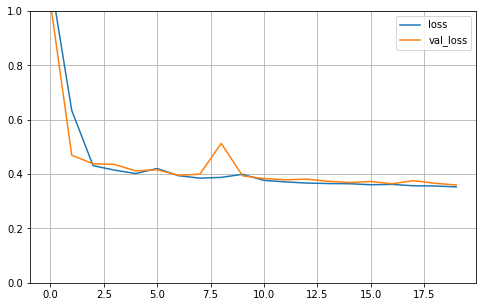

In [15]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)

In [21]:
model.evaluate(xtest_scaled, ytest, verbose=0)

0.3765212297439575